<a href="https://colab.research.google.com/github/yeonui-0626/lstm/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
from google.colab import drive
import io

import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from pandas import concat

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv', index_col=2)
data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02/03/2018 08:47:38,443,6,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.30523,113.166177,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
02/03/2018 08:47:38,49684,6,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.31670,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
02/03/2018 08:47:40,443,6,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.08640,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
02/03/2018 08:47:40,443,6,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
02/03/2018 08:47:41,443,6,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.60726,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
data = data[['Label','Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]

In [6]:
data.index.name = 'date'
data

,Label,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02/03/2018 08:47:38,Benign,443,6,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.305230,113.166177,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.1250,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/03/2018 08:47:38,Benign,49684,6,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.316700,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.0000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/03/2018 08:47:40,Benign,443,6,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.086400,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.8000,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/03/2018 08:47:40,Benign,443,6,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.0000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/03/2018 08:47:41,Benign,443,6,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.607260,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.2500,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02/03/2018 02:08:18,Benign,3389,6,3982183,14,8,1442,1731.0,725,0,103.000000,191.125412,1179,0,216.375000,405.464791,796.799143,5.524608,189627.761900,257112.296400,953396.0,34.0,3982183.0,306321.7692,340816.37320,1221092.0,23468.0,3930879.0,561554.14290,350274.78920,953825.0,131451.0,0,0,0,0,292,172,3.515660,2.008948,0,1179

In [7]:
# 결측치  저리
data = data.replace([np.inf, -np.inf], np.nan)
data['Flow Byts/s'].fillna(0.0,inplace=True)
data['Flow Pkts/s'].fillna(0.0,inplace=True)
data.iloc[111,17]

0.0

In [8]:
values = data.values
values

array([['Benign', 443, 6, ..., 0.0, 0.0, 0.0],
       ['Benign', 49684, 6, ..., 0.0, 0.0, 0.0],
       ['Benign', 443, 6, ..., 0.0, 0.0, 0.0],
       ...,
       ['Benign', 3389, 6, ..., 0.0, 0.0, 0.0],
       ['Benign', 3389, 6, ..., 0.0, 0.0, 0.0],
       ['Benign', 3389, 6, ..., 0.0, 0.0, 0.0]], dtype=object)

In [30]:
# 문자 data encoding
encoder = preprocessing.LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])
values  = values.astype('float64')

In [31]:
values

array([[0.0000e+00, 4.4300e+02, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 4.9684e+04, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 4.4300e+02, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 3.3890e+03, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 3.3890e+03, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 3.3890e+03, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [38]:
# inf 값 찾기

#inf_d = np.where(np.isinf(values)==True)
#inf_d

np.where(values[:,0] == 0.0)[0].shape
np.where(values[:,0] == 1.0)[0].shape

(286191,)

In [39]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [13]:
scaled

array([[0.        , 0.00675985, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75814081, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00675985, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05171361, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05171361, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05171361, 0.35294118, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
# series_to_supervised(data, n_in, n_out) : pre_prepaed function 
# 입출력 시퀀스 길이 지정
# n_in : 입력 지연 관찰 수
# n_out : 출력 관찰 수
# n_in = 3, n_out = 3이라면 t-3 , t-2 , t-1 , t , t+1 , t+2 시점의 데이터가 하나의 행이 됨.
# return 은 Dataframe

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

reframed = series_to_supervised(scaled,1,1)

In [41]:
values = reframed.values
values

array([[0.        , 0.00675985, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75814081, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00675985, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05171361, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05171361, 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05171361, 0.35294118, ..., 0.        , 0.        ,
        0.        ]])

In [45]:
train_split = int(1048575 * 0.7)
train = values[:train_split,:]
test = values[train_split:,:]

# 왜지...??????? 
train_X, train_y = train[:,:-1], train[:,-1]
test_X, test_y = test[:,:-1],test[:,-1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [48]:
from keras.layers import LSTM, Dense, Concatenate, Dropout
from keras.models import Sequential
import keras.backend as k
from keras.callbacks import EarlyStopping
from math import sqrt

# model 생성
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [50]:
history = model.fit(train_X, train_y, epochs=10, batch_size=100,
                   validation_data=(test_X, test_y), verbose=1, shuffle=False)

Epoch 1/10
7341/7341 [==============================] - 57s 4ms/step - loss: 0.0347 - val_loss: 0.0759
Epoch 2/10
7341/7341 [==============================] - 26s 4ms/step - loss: 0.0220 - val_loss: 0.0754
Epoch 3/10
7341/7341 [==============================] - 26s 4ms/step - loss: 0.0218 - val_loss: 0.0751
Epoch 4/10
7341/7341 [==============================] - 26s 4ms/step - loss: 0.0217 - val_loss: 0.0751
Epoch 5/10
7341/7341 [==============================] - 26s 4ms/step - loss: 0.0217 - val_loss: 0.0750
Epoch 6/10
7341/7341 [==============================] - 26s 4ms/step - loss: 0.0217 - val_loss: 0.0750
Epoch 7/10
7341/7341 [==============================] - 27s 4ms/step - loss: 0.0217 - val_loss: 0.0749
Epoch 8/10
7341/7341 [==============================] - 27s 4ms/step - loss: 0.0216 - val_loss: 0.0749
Epoch 9/10
7341/7341 [==============================] - 27s 4ms/step - loss: 0.0216 - val_loss: 0.0749
Epoch 10/10
7341/7341 [==============================] - 26s 4ms/step - l

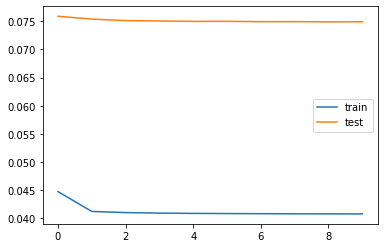

In [51]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [26]:
test_X.shape

(314572, 1, 157)

In [1]:
from keras.layers import concatenate
from math import sqrt

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmse

NameError: ignored